In [2]:
import pandas as pd
from pandas_datareader import data, wb # This will import the data reader
import weightedcalcs as wc
import numpy as np

import matplotlib.pyplot as plt

fig_path = "C:\\Users\\mwaugh.NYC-STERN\\Documents\\GitHub\\EGB\\materials\\figures"

In [4]:
codes = ["CIVPART" ,"UNRATE"] 
# nomial gdp, imports, imports from china, constant maturity 1 year rate, cip (no energy or food)

fred = data.DataReader(codes,"fred",1990)  # Then for fred, you hand it the codes
                                            # Tell it you want to ask from FRED
                                            # then tell it the start date

In [5]:
fred.head()

,CIVPART,UNRATE
DATE,,
1990-01-01,66.8,5.4
1990-02-01,66.7,5.3
1990-03-01,66.7,5.2
1990-04-01,66.6,5.4
1990-05-01,66.6,5.4


In [12]:
urate = pd.DataFrame(fred["UNRATE"].resample("Q", convention= 'end').mean())

participation = pd.DataFrame(fred["CIVPART"].resample("Q", convention= 'end').mean())

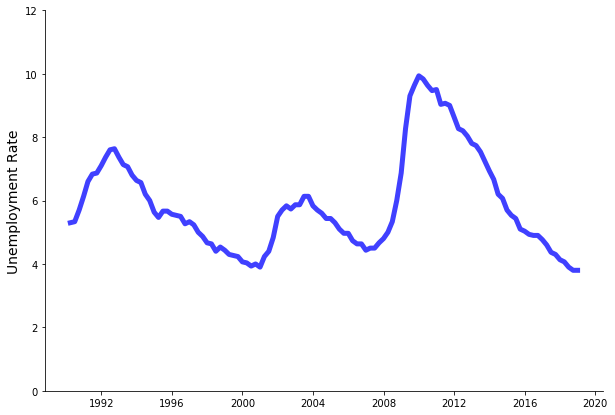

In [20]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(urate, color = "blue",
        linewidth = 5, label = "Unemployment", alpha = 0.75)

ax.set_ylabel("Unemployment Rate", fontsize = 14)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylim(0,12)

plt.savefig(fig_path + "\\unemployment_rate.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

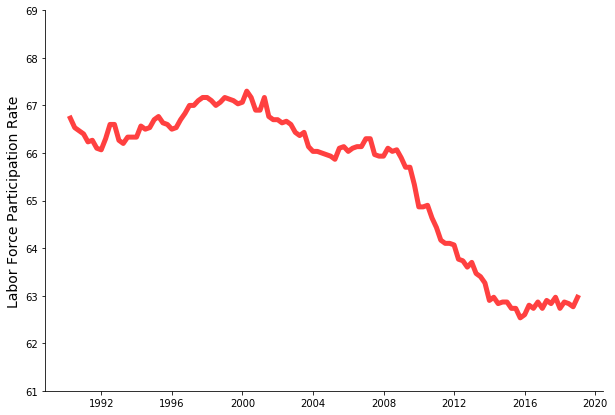

In [22]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(participation , color = "red",
        linewidth = 5, label = "Participation", alpha = 0.75)

ax.set_ylabel("Labor Force Participation Rate", fontsize = 14)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylim(61,69)

plt.savefig(fig_path + "\\participation_rate.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

### Labor's Share


In [24]:
codes = ["A033RC1A027NBEA" ,"GDP"] 
# nomial gdp, imports, imports from china, constant maturity 1 year rate, cip (no energy or food)

fred = data.DataReader(codes,"fred",1950)  # Then for fred, you hand it the codes
                                            # Tell it you want to ask from FRED

In [25]:
fred.head()

,A033RC1A027NBEA,GDP
DATE,,
1950-01-01,158.269,280.828
1950-04-01,NaN,290.383
1950-07-01,NaN,308.153
1950-10-01,NaN,319.945
1951-01-01,185.705,336.000


In [26]:
fred["labor_share"] = fred.A033RC1A027NBEA / fred.GDP

In [27]:
fred.head()

,A033RC1A027NBEA,GDP,labor_share
DATE,,,
1950-01-01,158.269,280.828,0.563580
1950-04-01,NaN,290.383,NaN
1950-07-01,NaN,308.153,NaN
1950-10-01,NaN,319.945,NaN
1951-01-01,185.705,336.000,0.552693


In [28]:
fred.dropna()

,A033RC1A027NBEA,GDP,labor_share
DATE,,,
1950-01-01,158.269,280.828,0.563580
1951-01-01,185.705,336.000,0.552693
1952-01-01,201.088,359.820,0.558857
1953-01-01,215.245,387.980,0.554784
1954-01-01,214.139,385.345,0.555707
1955-01-01,230.571,413.073,0.558185
1956-01-01,249.275,439.746,0.566861
1957-01-01,262.576,469.779,0.558935
1958-01-01,264.670,467.540,0.566091


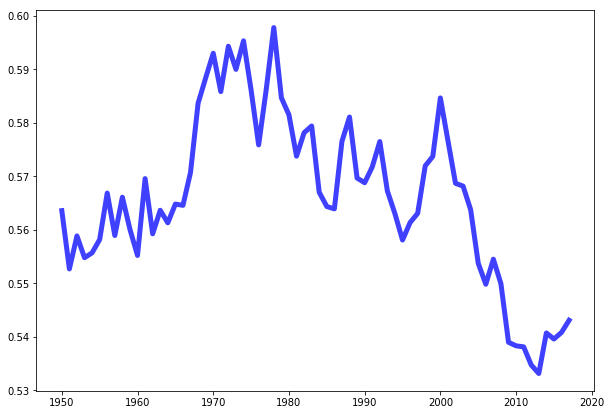

In [29]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(fred.dropna().labor_share, color = "blue",
        linewidth = 5, label = "Unemployment", alpha = 0.75)